In [1]:
#Importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
df = pd.read_csv('mushrooms.csv')

In [12]:
pd.set_option('display.max_columns', None)
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [4]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [6]:
df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

<AxesSubplot: xlabel='class', ylabel='count'>

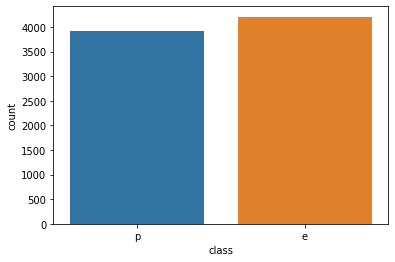

In [7]:
#Plotting countplot for class column
sns.countplot(x ='class', data = df)

Data is balanced

In [23]:
#Renaming class column
#df.rename(columns={"class": "Edible"}, inplace= True)

#Changing output values to 1 for edible and 0 for poisonous
df['class'] = np.where(df["class"] == "e", 1, 0)

In [24]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,1,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,1,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,0,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,1,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [25]:
#Split the dataset into dependent(X) and Independent(Y) datasets
X=df.iloc[:,1:23].values
Y=df.iloc[:,0].values

In [26]:
X

array([['x', 's', 'n', ..., 'k', 's', 'u'],
       ['x', 's', 'y', ..., 'n', 'n', 'g'],
       ['b', 's', 'w', ..., 'n', 'n', 'm'],
       ...,
       ['f', 's', 'n', ..., 'b', 'c', 'l'],
       ['k', 'y', 'n', ..., 'w', 'v', 'l'],
       ['x', 's', 'n', ..., 'o', 'c', 'l']], dtype=object)

In [27]:
Y

array([0, 1, 1, ..., 1, 0, 1])

In [28]:
#Spliting the data into trainning and test dateset
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=0)

In [29]:
X_train.shape

(6499, 22)

In [30]:
X_test.shape

(1625, 22)

In [31]:
X_train.dtype

dtype('O')

In [32]:
col=df.columns
y = pd.DataFrame(Y_train, columns=['Edible'])
train_data = pd.DataFrame(X_train, columns=col[1:])
train_data = pd.concat([train_data, y], axis=1)
train_data

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,Edible
0,k,s,g,f,n,f,w,b,p,e,?,s,s,w,w,p,w,t,p,w,s,g,1
1,x,f,w,f,n,f,w,b,g,e,?,s,s,w,w,p,w,t,p,w,n,g,1
2,x,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,k,s,m,1
3,f,s,w,f,n,f,w,b,h,t,e,s,f,w,w,p,w,o,e,k,s,g,1
4,k,y,e,f,y,f,c,n,b,t,?,s,k,w,p,p,w,o,e,w,v,l,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6494,x,y,e,t,n,f,c,b,e,e,?,s,s,e,e,p,w,t,e,w,c,w,1
6495,x,f,g,f,f,f,c,b,h,e,b,k,k,p,n,p,w,o,l,h,y,p,0
6496,x,s,g,f,n,f,w,b,h,t,e,f,s,w,w,p,w,o,e,n,s,g,1
6497,f,f,n,t,n,f,c,b,n,t,b,s,s,g,g,p,w,o,p,n,v,d,1


In [18]:
train_data['veil-type'].value_counts()

p    6499
Name: veil-type, dtype: int64

Since all the veils are of type partial, it does not contribute to the classification result

In [ ]:
#Checking for all static columns
for drop_col in 
[e for e in df.columns if df[e].nunique() == 1]

In [19]:
#Dropping veil-type column
train_data.drop(drop_col, axis=1, inplace=True)

<AxesSubplot: xlabel='odor', ylabel='count'>

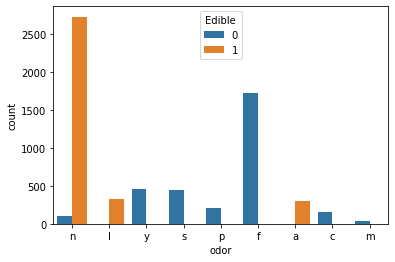

In [61]:
sns.countplot(data=train_data, x="odor", hue="Edible")

In [62]:
train_data.groupby('odor')['Edible'].value_counts()

odor  Edible
a     1          299
c     0          154
f     0         1730
l     1          323
m     0           31
n     1         2734
      0          101
p     0          213
s     0          451
y     0          463
Name: Edible, dtype: int64

In [63]:
train_data['odor'].value_counts()

n    2835
f    1730
y     463
s     451
l     323
a     299
p     213
c     154
m      31
Name: odor, dtype: int64

According to this, mushrooms with pleasant odors - almond, anise are edible and mushrooms with unpleasant odors are poisonous

But there is a large portion which have odor = None, this may be because of missing data

In [64]:
#Converting odor feature in numerical format
train_data.rename(columns={"odor": "pleasant_odor"}, inplace= True)

#Assigned -1 for missing data, will impute it later
conditions = [((train_data['pleasant_odor']=="a") | (train_data['pleasant_odor']=="l")),
              ((train_data['pleasant_odor']!="a") & (train_data['pleasant_odor']!="l") & (train_data['pleasant_odor']!="n")),
                (train_data['pleasant_odor']=="n") ]
train_data['pleasant_odor']=np.select(conditions, [1,0,-1])

<AxesSubplot: xlabel='pleasant_odor', ylabel='count'>

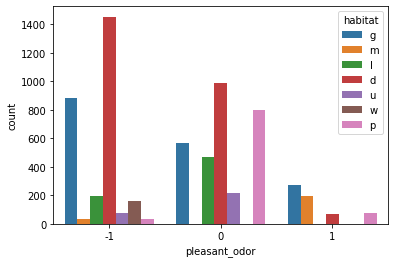

In [65]:
sns.countplot(data=train_data, x="pleasant_odor", hue="habitat")

In [66]:
train_data['pleasant_odor'].value_counts()

 0    3042
-1    2835
 1     622
Name: pleasant_odor, dtype: int64

In [103]:
from numpy import isnan
from pandas import read_csv
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# print total missing
print('Missing: %d' % sum(isnan(X).flatten()))
# define imputer
imputer = IterativeImputer()
# fit on the dataset
imputer.fit(X)
# transform the dataset
Xtrans = imputer.transform(X)
# print total missing
print('Missing: %d' % sum(isnan(Xtrans).flatten()))

In [84]:
df['bruises'].value_counts()

0    4748
1    3376
Name: bruises, dtype: int64

In [35]:
#Changing bruises to int type
df['bruises'] = np.where(df["bruises"] == "t", 1, 0)

<AxesSubplot: xlabel='bruises', ylabel='count'>

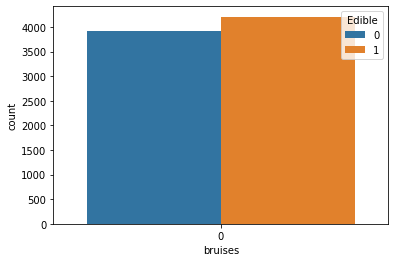

In [86]:
#Plotting relations for bruises 
sns.countplot(data=df, x="bruises", hue="Edible")

Most of the mushrooms with bruises are edible, some relation can be seen from this feature

In [87]:
df.head()

,Edible,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-broad,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,x,s,n,0,p,f,c,0,k,e,e,s,s,w,w,w,o,p,k,s,u
1,1,x,s,y,0,a,f,c,1,k,e,c,s,s,w,w,w,o,p,n,n,g
2,1,b,s,w,0,l,f,c,1,n,e,c,s,s,w,w,w,o,p,n,n,m
3,0,x,y,w,0,p,f,c,0,n,e,e,s,s,w,w,w,o,p,k,s,u
4,1,x,s,g,0,n,f,w,1,k,t,e,s,s,w,w,w,o,e,n,a,g


In [77]:
df['gill-size'].unique()

array(['n', 'b'], dtype=object)

In [36]:
#Renaming gill-size column to gill-broad
df.rename(columns={"gill-size": "gill-broad"}, inplace= True)

#Changing broad values to 1 and narrow to 0
df['gill-broad'] = np.where(df["gill-broad"] == "b", 1, 0)

<AxesSubplot: xlabel='gill-broad', ylabel='count'>

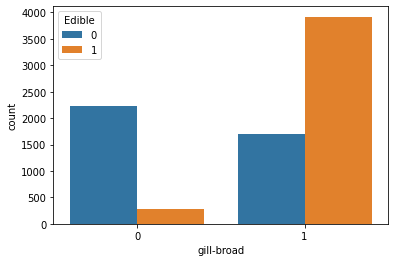

In [37]:
#Plotting relations with respect to gill-attachment 
sns.countplot(data=df, x="gill-broad", hue="Edible")

Most of the mushrooms with thin gills are inedible, so this feature also contributes to the outcome

In [50]:
df.dtypes

Edible                       int32
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                      int32
pleasant_odor                int32
gill-attached                int32
gill-closed/crowded          int32
gill-broad                   int32
gill-color                  object
stalk-tapered                int32
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-color                  object
ring-number                  int64
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [20]:
df['gill-attachment'].value_counts()

f    7914
a     210
Name: gill-attachment, dtype: int64

In [39]:
#Renaming gill attachment
df.rename(columns={'gill-attachment': 'gill-attached'}, inplace=True)

#Changing gill attachment to int type
df['gill-attached'] = np.where(df['gill-attached'] == "a", 1, 0)

<AxesSubplot: xlabel='gill-attached', ylabel='count'>

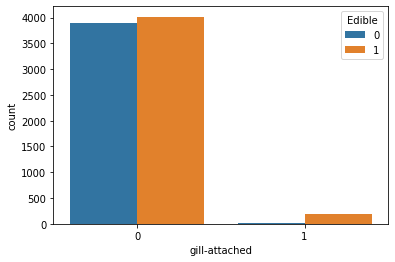

In [40]:
#Plotting relations with respect to gill-attachment 
sns.countplot(data=df, x="gill-attached", hue="Edible")

In [41]:
df['ring-number'].unique()

array(['o', 't', 'n'], dtype=object)

In [42]:
ring_number = {'n':0,
              'o':1,
              't':2}
df['ring-number'] = df['ring-number'].map(ring_number)

<AxesSubplot: xlabel='ring-number', ylabel='count'>

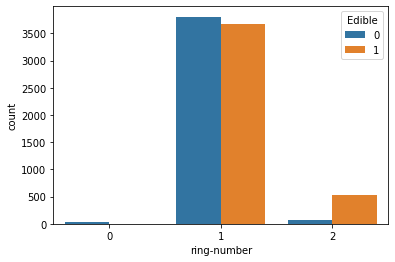

In [43]:
#Plotting relations with respect to ring number
sns.countplot(data=df, x="ring-number", hue="Edible")

In [44]:
df['stalk-shape'].value_counts()

t    4608
e    3516
Name: stalk-shape, dtype: int64

In [45]:
#Renaming stalk shape
df.rename(columns={'stalk-shape': 'stalk-tapered'}, inplace=True)

#Changing to int type
df['stalk-tapered'] = np.where(df['stalk-tapered'] == "t", 1, 0)

<AxesSubplot: xlabel='stalk-tapered', ylabel='count'>

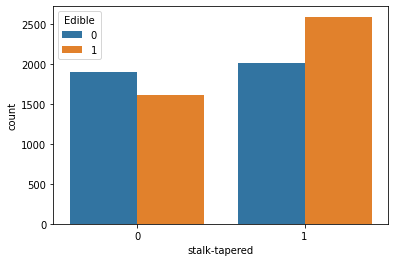

In [46]:
#Plotting relations with respect to stalk shape
sns.countplot(data=df, x="stalk-tapered", hue="Edible")

In [49]:
#Renaming gill spacing
df.rename(columns={'gill-spacing': 'gill-closed/crowded'}, inplace=True)

#Changing to int type
df['gill-closed/crowded'] = np.where(df['gill-closed/crowded'] == "c", 1, 0)

<AxesSubplot: xlabel='stalk-root', ylabel='count'>

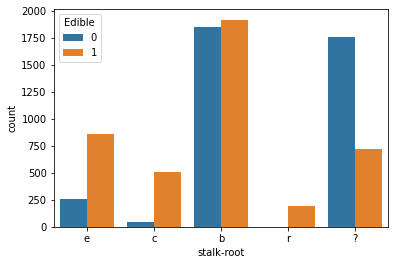

In [53]:
sns.countplot(data=df, x='stalk-root', hue="Edible")

Will replace missing values(?) according to other columns

<AxesSubplot: xlabel='stalk-surface-above-ring', ylabel='count'>

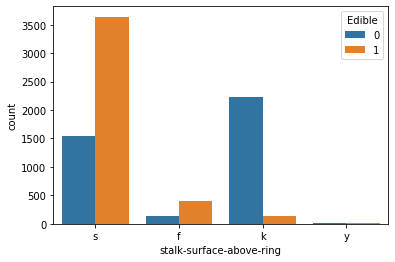

In [54]:
sns.countplot(data=df, x='stalk-surface-above-ring', hue="Edible")

<AxesSubplot: xlabel='stalk-surface-below-ring', ylabel='count'>

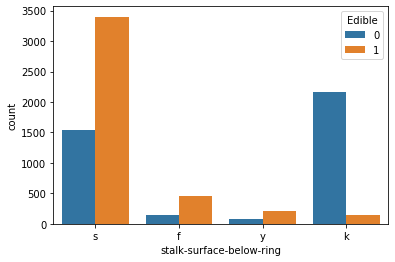

In [55]:
sns.countplot(data=df, x='stalk-surface-below-ring', hue="Edible")

<AxesSubplot: xlabel='gill-color', ylabel='count'>

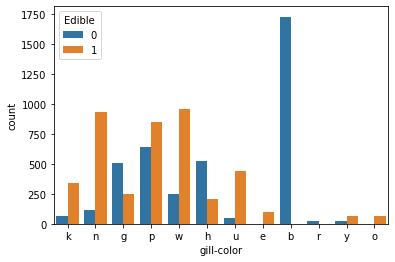

In [56]:
sns.countplot(data=df, x='gill-color', hue="Edible")

<AxesSubplot: xlabel='veil-color', ylabel='count'>

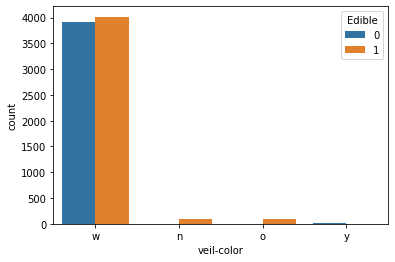

In [57]:
sns.countplot(data=df, x='veil-color', hue="Edible")

In [58]:
df['veil-color'].value_counts()

w    7924
n      96
o      96
y       8
Name: veil-color, dtype: int64

Dropping veil color feature as it is mostly static

<AxesSubplot: xlabel='ring-type', ylabel='count'>

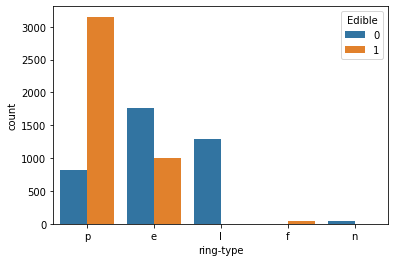

In [59]:
sns.countplot(data=df, x='ring-type', hue="Edible")

<AxesSubplot: xlabel='cap-surface', ylabel='count'>

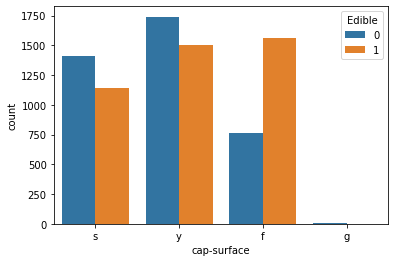

In [60]:
sns.countplot(data=df, x='cap-surface', hue="Edible")

<AxesSubplot: xlabel='cap-shape', ylabel='count'>

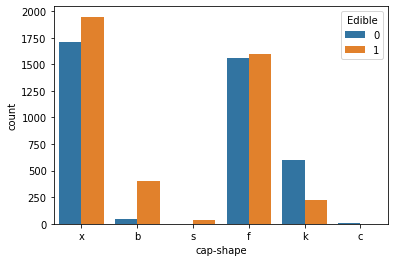

In [61]:
sns.countplot(data=df, x='cap-shape', hue="Edible")

<AxesSubplot: xlabel='population', ylabel='count'>

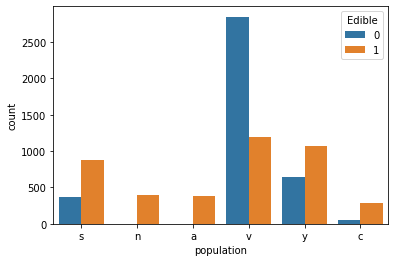

In [33]:
sns.countplot(data=df, x="population", hue="Edible")

<AxesSubplot: xlabel='habitat', ylabel='count'>

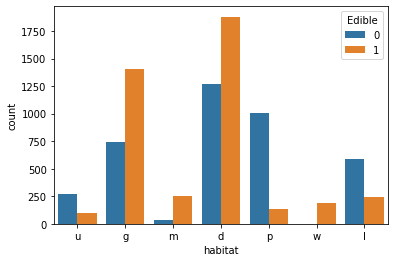

In [34]:
sns.countplot(data=df, x="habitat", hue="Edible")

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df.iloc[:,1]=labelencoder.fit_transform(df.iloc[:,1].values)

In [73]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
df['bruises'] = labelencoder.fit_transform(df['bruises'])

In [81]:
df['gill-color'] = labelencoder.fit_transform(df['gill-color'])

In [86]:
df=pd.get_dummies(df,columns=["gill-color"],drop_first=True)

In [89]:
col_to_be_converted = df.columns
labelencoder=LabelEncoder()
for col in col_to_be_converted:
    df[col] = labelencoder.fit_transform(df[col])

In [90]:
df=pd.get_dummies(df, columns = col_to_be_converted, drop_first = True)

In [91]:
df.head()

,class_1,cap-shape_1,cap-shape_2,cap-shape_3,cap-shape_4,cap-shape_5,cap-surface_1,cap-surface_2,cap-surface_3,cap-color_1,cap-color_2,cap-color_3,cap-color_4,cap-color_5,cap-color_6,cap-color_7,cap-color_8,cap-color_9,bruises_1,odor_1,odor_2,odor_3,odor_4,odor_5,odor_6,odor_7,odor_8,gill-attachment_1,gill-spacing_1,gill-size_1,stalk-shape_1,stalk-root_1,stalk-root_2,stalk-root_3,stalk-root_4,stalk-surface-above-ring_1,stalk-surface-above-ring_2,stalk-surface-above-ring_3,stalk-surface-below-ring_1,stalk-surface-below-ring_2,stalk-surface-below-ring_3,stalk-color-above-ring_1,stalk-color-above-ring_2,stalk-color-above-ring_3,stalk-color-above-ring_4,stalk-color-above-ring_5,stalk-color-above-ring_6,stalk-color-above-ring_7,stalk-color-above-ring_8,stalk-color-below-ring_1,stalk-color-below-ring_2,stalk-color-below-ring_3,stalk-color-below-ring_4,stalk-color-below-ring_5,stalk-color-below-ring_6,stalk-color-below-ring_7,stalk-color-below-ring_8,veil-color_1,veil-color_2,veil-color_3,ring-number_1,ring-number_2,ring-type_1,ring-type_2,ring-type_3,ring-type_4,spore-print-color_1,spore-print-color_2,spore-print-color_3,spore-print-color_4,spore-print-color_5,spore-print-color_6,spore-print-color_7,spore-print-color_8,population_1,population_2,population_3,population_4,population_5,habitat_1,habitat_2,habitat_3,habitat_4,habitat_5,habitat_6,gill-color_1_1,gill-color_2_1,gill-color_3_1,gill-color_4_1,gill-color_5_1,gill-color_6_1,gill-color_7_1,gill-color_8_1,gill-color_9_1,gill-color_10_1,gill-color_11_1
0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [78]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [36]:
#Standard scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Not to be done. only for reference

<AxesSubplot: >

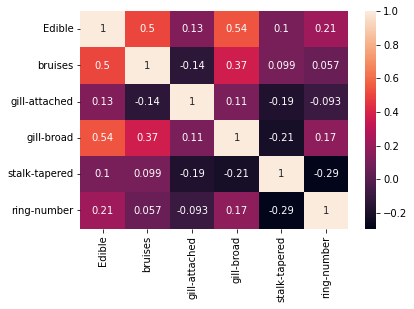

In [35]:
sns.heatmap(df.corr(),annot=True)

<AxesSubplot: ylabel='stalk-surface-below-ring'>

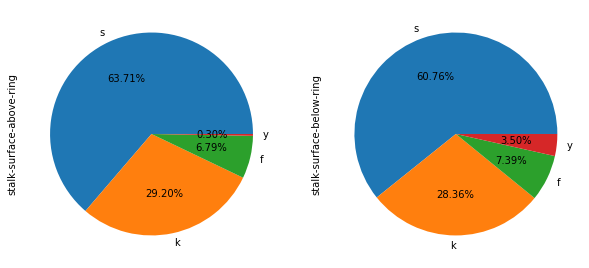

In [36]:
#Stalk surface above ring, stalk surface below ring comparison
ax1 = plt.subplot2grid((1,2),(0,0))
df['stalk-surface-above-ring'].value_counts().plot(kind='pie', figsize=(10, 10), autopct = "%0.2f%%")

ax1 = plt.subplot2grid((1,2),(0,1))
df['stalk-surface-below-ring'].value_counts().plot(kind='pie', figsize=(10, 10), autopct = "%0.2f%%")

Data looks mostly similar

In [63]:
conditions = [df['stalk-surface-above-ring']==df['stalk-surface-below-ring'],
                df['stalk-surface-above-ring']!=df['stalk-surface-below-ring']]
df['stalk_surface_similar']=np.select(conditions, [1,0])

In [64]:
df['stalk_surface_similar'].value_counts()

1    6256
0    1868
Name: stalk_surface_similar, dtype: int64

In [39]:
#sns.countplot(data=df, x="stalk_color_similar", hue="Edible")

<AxesSubplot: ylabel='stalk-color-below-ring'>

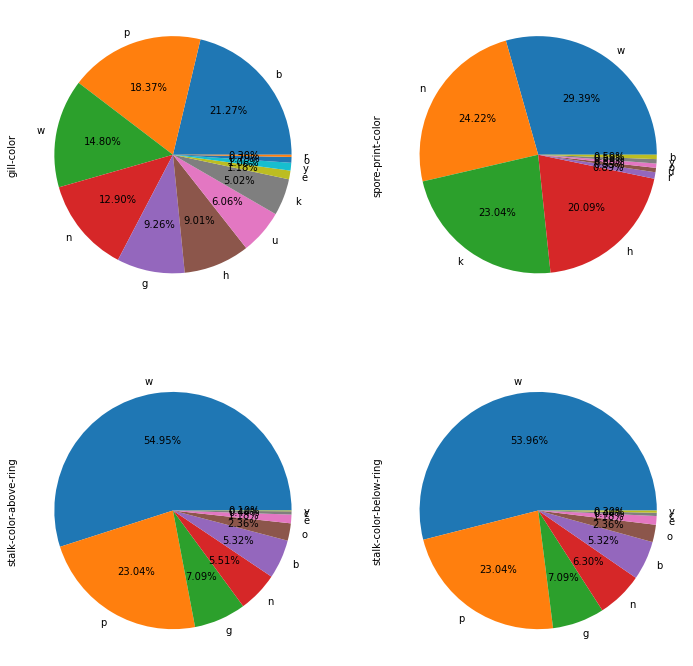

In [40]:
#Checking the features with similar color
ax1 = plt.subplot2grid((2,2),(0,0))
df['gill-color'].value_counts().plot(kind='pie', figsize=(12, 12), autopct = "%0.2f%%")

ax1 = plt.subplot2grid((2,2),(0,1))
df['spore-print-color'].value_counts().plot(kind='pie', figsize=(12, 12), autopct = "%0.2f%%")

ax1 = plt.subplot2grid((2,2),(1,0))
df['stalk-color-above-ring'].value_counts().plot(kind='pie', figsize=(12, 12), autopct = "%0.2f%%")

ax1 = plt.subplot2grid((2,2),(1,1))
df['stalk-color-below-ring'].value_counts().plot(kind='pie', figsize=(12, 12), autopct = "%0.2f%%")

Division of data in stalk color above ring and below ring looks almost similar so lets compared to data

In [59]:
conditions = [df['stalk-color-above-ring']==df['stalk-color-below-ring'],
                df['stalk-color-above-ring']!=df['stalk-color-below-ring']]
df['stalk_color_similar']=np.select(conditions, [1,0])

In [42]:
df['stalk-color-above-ring'][0]==df['stalk-color-below-ring'][0]

True

In [48]:
df.dtypes

Edible                       int32
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                      int32
pleasant_odor                int32
gill-attached                int32
gill-spacing                object
gill-broad                   int32
gill-color                  object
stalk-tapered                int32
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-color                  object
ring-number                  int64
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [110]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor_unpleasant,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,1,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,0,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,0,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,1,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,0,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [61]:
df['stalk_color_similar'].value_counts()

1    5068
0    3056
Name: stalk_color_similar, dtype: int64

In [46]:
df.drop(['stalk_color_similar'], axis=1, inplace=True)

In [47]:
df['stalk_surface_similar'].value_counts()

1    6256
0    1868
Name: stalk_surface_similar, dtype: int64

In [48]:
df.drop(['stalk_surface_similar'], axis=1, inplace=True)

In [109]:
#Changing column for mushrooms with pleasant and unpleasant odors since it has high correlation with outpput variable
df.rename(columns={'odor': 'odor_unpleasant'}, inplace=True)

#Changing values accordingly
df['odor_unpleasant']= np.where(((df['odor_unpleasant']=="a") | (df['odor_unpleasant']=="l") | (df['odor_unpleasant']=="n")),0,1)

<AxesSubplot: xlabel='ring-type', ylabel='count'>

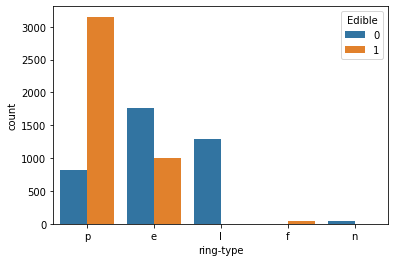

In [51]:
sns.countplot(data=df, x="ring-type", hue="Edible")

<AxesSubplot: xlabel='cap-shape', ylabel='count'>

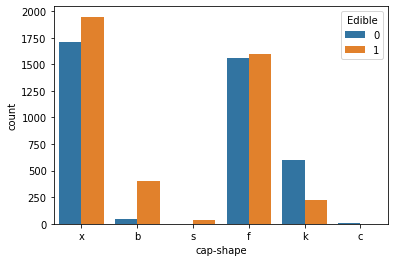

In [52]:
sns.countplot(data=df, x="cap-shape", hue="Edible")

<AxesSubplot: xlabel='stalk-surface-above-ring', ylabel='count'>

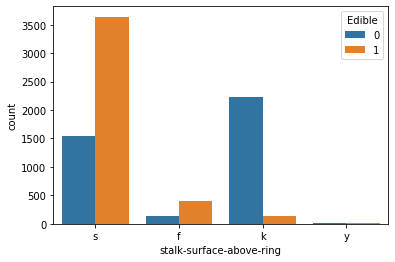

In [76]:
sns.countplot(data=df, x="stalk-surface-above-ring", hue="Edible")

#sns.countplot(data=df, x="stalk-surface-below-ring")
#sns.countplot(data=df, x="stalk_color_similar")

In [71]:
df['gill-spacing'].value_counts()

c    6812
w    1312
Name: gill-spacing, dtype: int64

In [72]:
df['gill-attached'].value_counts()

0    7914
1     210
Name: gill-attached, dtype: int64